In [51]:
# Import dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import hvplot.pandas

In [52]:
# Read in the CSV file as a Pandas DataFrame
e_customer_segmentation_df= pd.read_csv(
    Path("/Users/julia/DATA-PT-EAST-JULY-071524/project4/ecommerce_customer_data.csv")
)

# Review the DataFrame
e_customer_segmentation_df

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Clothing,Electronics,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate
0,0,1,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,...,18,12,24,24,9,9,0,0.593750,0.062116,0.341417
1,1,2,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,...,3,6,12,12,3,6,3,0.875000,0.061381,0.061304
2,2,3,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,...,3,12,15,18,3,6,6,0.800000,0.079156,0.118610
3,3,4,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,...,9,9,15,21,3,27,3,0.724138,0.068396,0.205029
4,4,5,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,...,15,9,3,15,0,12,12,0.590909,0.135154,0.269760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38682,38682,38683,661293.39,7601.073448,14951.49,608.30,5136.208097,87,5,7,...,18,9,6,21,6,6,12,0.689655,0.102635,0.205029
38683,38683,38684,630554.73,7247.755517,13895.52,397.96,4340.511978,87,1,3,...,18,6,18,27,0,9,3,0.551724,0.171327,0.273588
38684,38684,38685,618477.30,7362.825000,14789.57,379.76,4433.046913,84,56,5,...,15,15,27,15,3,0,9,0.571429,0.070946,0.354432
38685,38685,38686,763392.39,7952.004063,14832.69,3.60,4956.736097,96,19,4,...,15,12,24,9,6,12,18,0.593750,0.186347,0.216987


In [53]:
e_customer_segmentation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38687 entries, 0 to 38686
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            38687 non-null  int64  
 1   UserID                38687 non-null  int64  
 2   TotalAmount           38687 non-null  float64
 3   AvgAmount             38687 non-null  float64
 4   MaxAmount             38687 non-null  float64
 5   MinAmount             38687 non-null  float64
 6   AmountStd             38687 non-null  float64
 7   TransactionCount      38687 non-null  int64  
 8   Recency               38687 non-null  int64  
 9   PreferredHour         38687 non-null  int64  
 10  FraudRate             38687 non-null  float64
 11  DeclineRate           38687 non-null  float64
 12  UniquePaymentMethods  38687 non-null  int64  
 13  PreferredPayment      38687 non-null  object 
 14  PreferredDevice       38687 non-null  object 
 15  Lat                

In [54]:
e_customer_segmentation_df=e_customer_segmentation_df.drop('PreferredPayment',axis=1)
e_customer_segmentation_df=e_customer_segmentation_df.drop('PreferredDevice',axis=1)
e_customer_segmentation_df.head()

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Clothing,Electronics,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate
0,0,1,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,...,18,12,24,24,9,9,0,0.593750,0.062116,0.341417
1,1,2,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,...,3,6,12,12,3,6,3,0.875000,0.061381,0.061304
2,2,3,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,...,3,12,15,18,3,6,6,0.800000,0.079156,0.118610
3,3,4,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,...,9,9,15,21,3,27,3,0.724138,0.068396,0.205029
4,4,5,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,...,15,9,3,15,0,12,12,0.590909,0.135154,0.269760


In [55]:
e_customer_segmentation_df.describe()

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Clothing,Electronics,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate
count,38687.000000,38687.000000,3.868700e+04,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,...,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000,38687.000000
mean,19343.000000,19344.000000,6.058133e+05,7505.226382,14442.430468,555.696624,4258.139348,80.709282,24.466668,8.197508,...,12.203091,8.538605,19.551064,15.299713,4.903042,11.062553,6.088247,0.671958,0.103658,0.221400
std,11168.119269,11168.119269,1.347563e+05,850.655466,549.302517,555.939487,399.432491,15.517269,23.821326,6.650669,...,6.076473,5.058971,7.646515,6.797961,3.834796,5.778818,4.270257,0.092496,0.059764,0.081128
min,0.000000,1.000000,1.314151e+05,3447.278235,8994.080000,1.020000,2289.878731,24.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000
25%,9671.500000,9672.500000,5.120924e+05,6932.195607,14227.215000,159.905000,3997.407695,69.000000,6.000000,3.000000,...,9.000000,6.000000,15.000000,9.000000,3.000000,6.000000,3.000000,0.609756,0.061935,0.164764
50%,19343.000000,19344.000000,6.001135e+05,7500.404783,14608.530000,385.280000,4267.933779,81.000000,18.000000,6.000000,...,12.000000,9.000000,18.000000,15.000000,3.000000,12.000000,6.000000,0.676471,0.099010,0.218129
75%,29014.500000,29015.500000,6.930550e+05,8078.607834,14837.330000,769.075000,4529.550541,90.000000,34.000000,13.000000,...,15.000000,12.000000,24.000000,21.000000,6.000000,15.000000,9.000000,0.735294,0.141653,0.273588
max,38686.000000,38687.000000,1.266236e+06,10913.396667,14999.970000,5558.050000,5909.900097,153.000000,185.000000,23.000000,...,45.000000,36.000000,60.000000,51.000000,24.000000,42.000000,30.000000,1.000000,0.417582,0.596029


Run the K-means Model

In [56]:
from sklearn.preprocessing import StandardScaler
X=e_customer_segmentation_df.values[:,1:]
x=np.nan_to_num(X)
scaled_dataset = StandardScaler().fit_transform(X)
scaled_dataset

array([[-1.73200604,  1.03013011,  0.29544165, ..., -0.84553569,
        -0.69510838,  1.47938142],
       [-1.7319165 , -2.50876736, -2.26557431, ...,  2.19517405,
        -0.70740264, -1.9734113 ],
       [-1.73182695, -0.13822484,  0.38080729, ...,  1.38431812,
        -0.40998612, -1.26703933],
       ...,
       [ 1.73182695,  0.09397837, -0.16740411, ..., -1.08686186,
        -0.54735678,  1.63980896],
       [ 1.7319165 ,  1.16937834,  0.52522258, ..., -0.84553569,
         1.38361884, -0.05440254],
       [ 1.73200604, -1.01185426, -0.82459815, ..., -2.56419772,
        -1.01152   ,  3.65785596]])

In [57]:
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans
num_clusters = 3
k_means = KMeans(n_clusters=num_clusters, n_init=12)
k_means.fit(scaled_dataset)
labels = k_means.labels_
print(labels)

[1 2 0 ... 1 1 2]


In [58]:
e_customer_segmentation_df["Labels"] = labels
e_customer_segmentation_df.head(5)

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Electronics,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate,Labels
0,0,1,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,...,12,24,24,9,9,0,0.593750,0.062116,0.341417,1
1,1,2,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,...,6,12,12,3,6,3,0.875000,0.061381,0.061304,2
2,2,3,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,...,12,15,18,3,6,6,0.800000,0.079156,0.118610,0
3,3,4,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,...,9,15,21,3,27,3,0.724138,0.068396,0.205029,1
4,4,5,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,...,9,3,15,0,12,12,0.590909,0.135154,0.269760,2


In [64]:
e_customer_segmentation_df.groupby('Labels').mean()

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Clothing,Electronics,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate
Labels,,,,,,,,,,,,,,,,,,,,,
0,19279.812814,19280.812814,585270.231884,8257.970441,14559.010161,991.891568,4159.784938,70.903159,28.526326,8.062691,...,10.725716,7.533510,17.163862,13.340419,4.314733,9.782994,5.350162,0.672774,0.102855,0.221057
1,19437.067747,19438.067747,724795.654449,7623.308190,14611.895746,402.804348,4336.076194,95.204441,19.238648,8.284657,...,14.387277,9.999400,23.070614,18.093819,5.828166,12.982396,7.205441,0.674131,0.102611,0.220785
2,19286.182127,19287.182127,489349.340529,6808.980891,14167.019348,397.573234,4245.615162,72.006209,27.212950,8.202158,...,10.891492,7.674181,17.442531,13.673960,4.319388,9.895410,5.404169,0.668936,0.105420,0.222340


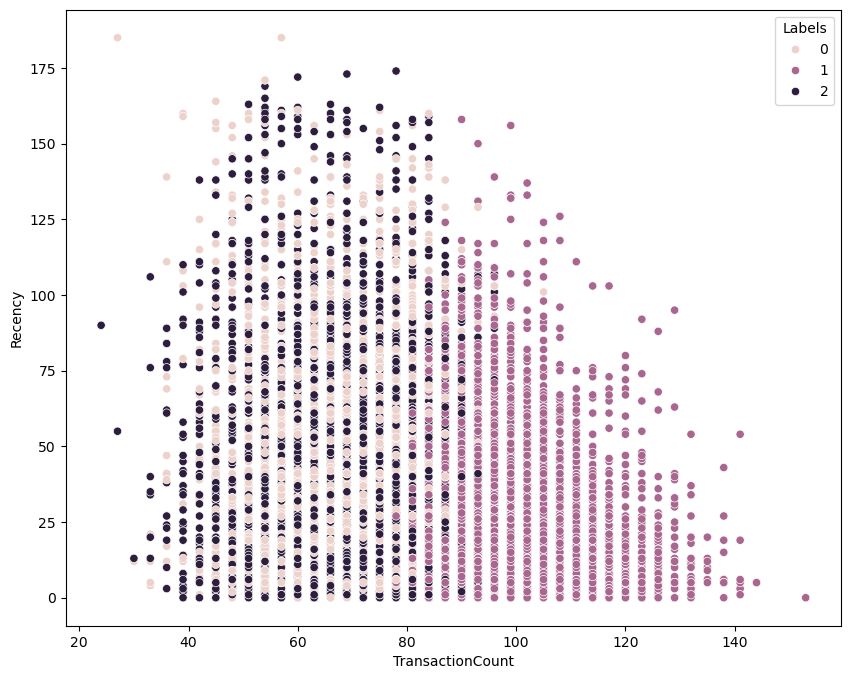

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize= (10, 8))
sns.scatterplot(x=e_customer_segmentation_df['TransactionCount'], y=e_customer_segmentation_df['Recency'], hue=e_customer_segmentation_df['Labels'])
plt.show()

In [ ]:
plt.figure(figsize= (10, 8))
sns.scatterplot(x=e_customer_segmentation_df['TransactionCount'], y=e_customer_segmentation_df['Recency'], hue=e_customer_segmentation_df['Labels'])
plt.show()

In [66]:
# Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=2, random_state=1)

# Print the model
model

KMeans(n_clusters=2, random_state=1)

In [67]:
# Fit the data to the instance of the model
model.fit(e_customer_segmentation_df)

KMeans(n_clusters=2, random_state=1)

In [68]:
# Make predictions about the data clusters using the trained model
customer_ratings = model.predict(e_customer_segmentation_df)

# Print the predictions
print(customer_ratings)

[0 1 1 ... 0 0 1]


In [69]:
# Create a copy of the DataFrame
e_customer_segmentation_df = e_customer_segmentation_df.copy()

# Add a column to the DataFrame that contains the customer_ratings information
e_customer_segmentation_df[??'customer rating'] = customer_ratings

# Review the DataFrame
e_customer_segmentation_df.head()

,Unnamed: 0,UserID,TotalAmount,AvgAmount,MaxAmount,MinAmount,AmountStd,TransactionCount,Recency,PreferredHour,...,Entertainment,Groceries,Home & Garden,Toys & Games,Travel,CompletedRate,FailedRate,PendingRate,Labels,customer rating
0,0,1,744628.05,7756.542188,13617.01,1849.05,3857.469258,96,6,11,...,24,24,9,9,0,0.593750,0.062116,0.341417,1,0
1,1,2,267745.35,5578.028125,13932.70,25.34,4295.277275,48,13,2,...,12,12,3,6,3,0.875000,0.061381,0.061304,2,1
2,2,3,587186.85,7829.158000,14839.74,524.56,4692.245814,75,29,3,...,15,18,3,6,6,0.800000,0.079156,0.118610,0,1
3,3,4,716990.91,8241.274828,14654.73,775.55,3907.163668,87,12,20,...,15,21,3,27,3,0.724138,0.068396,0.205029,1,0
4,4,5,506791.08,7678.652727,13744.94,829.46,4173.205202,66,6,11,...,3,15,0,12,12,0.590909,0.135154,0.269760,2,1


In [ ]:
# Plot the data points based on the customer rating
e_customer_segmentation_df.hvplot.scatter(
    x="mobile_app_rating", ?
    y="personal_banker_rating", 
    by="customer rating"
)